# Se entrena con valores pseudo aleatorios de $A_0, \tau, t$ y el correspondiente
# $ A = A_0 2^{-\frac{t}{2\tau}} $

# Input:
- $A_0$
- $\tau$
- $t$

MSE (Linear Perceptron): 74.7017
MSE (ReLU Perceptron): 32.2905
MSE (Tanh Perceptron): 194.2955
MSE (Sigmoid Perceptron): 194.2955
MSE (LeakyReLU Perceptron): 31.3893
Linear Perceptron: Weights = [ 0.19953966  1.65853075 -0.64068405], Bias = 4.3965
ReLU Perceptron: Weights = [ 0.32337748  3.76512913 -1.81556041], Bias = -0.6662
Tanh Perceptron: Weights = [6297.61629068  546.52062161  644.18620119], Bias = 0.2163
Sigmoid Perceptron: Weights = [6297.57267244  545.88766804  644.50930183], Bias = 0.3291
LeakyReLU Perceptron: Weights = [ 0.30423759  3.46134042 -1.65205026], Bias = 0.5734


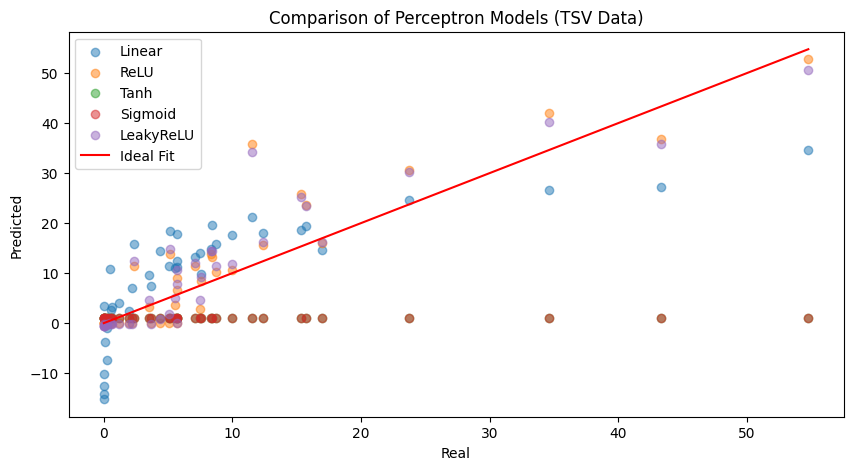

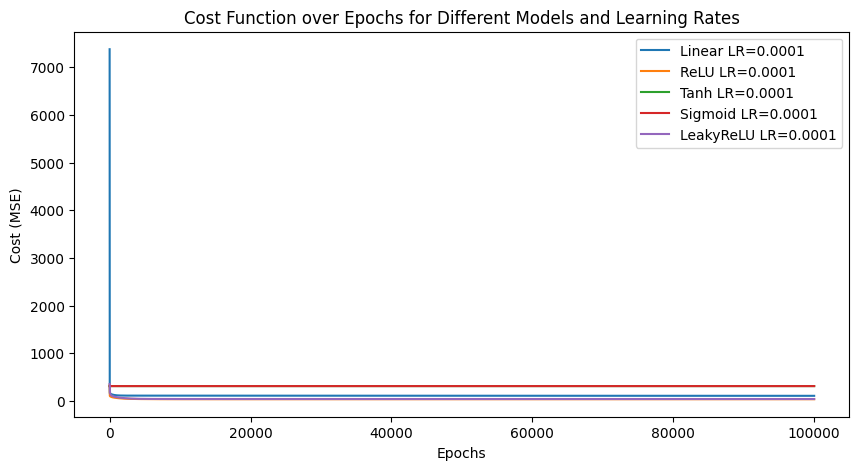

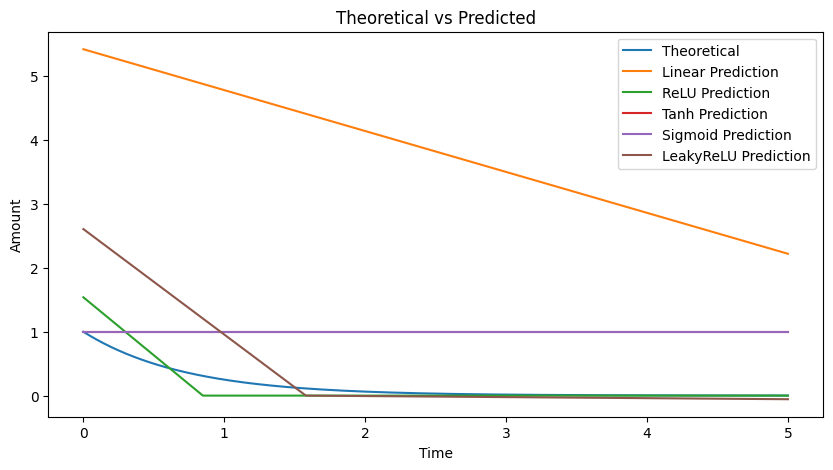

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

relu = lambda x: np.maximum(0, x)
sigmoid = lambda x: 1 / (1 + np.exp(-x))
leaky_relu = lambda x: np.where(x > 0, x, 0.01 * x)

def load_data(file_path):
  df = pd.read_csv(file_path, sep="\t").values
  return df[:, :3], df[:, 3]

def perceptron_train(X, y, activation, lr_values, epochs=100000):
  best_lr, best_w, best_b, lowest_mse = None, None, None, float('inf')
  cost_history = {}
  for lr in lr_values:
    w, b = np.random.randn(X.shape[1]), np.random.randn()
    costs = []
    for _ in range(epochs):
      y_pred = activation(X @ w + b)
      error = y - y_pred
      w += lr * (error @ X) / len(y)
      b += lr * error.mean()
      mse = np.mean(error ** 2)
      costs.append(mse)
      if mse < lowest_mse:
        best_lr, best_w, best_b, lowest_mse = lr, w, b, mse
        cost_history[lr] = costs
    return best_w, best_b, cost_history

def perceptron_predict(X, w, b, activation):
  return activation(X @ w + b)

X, y = load_data("./Data/random-decay.tsv")
split = int(0.8 * len(y))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

activations = {"Linear": lambda x: x, "ReLU": relu, "Tanh": np.tanh, "Sigmoid": sigmoid, "LeakyReLU": leaky_relu}
lr_values = [0.0001, 0.001, 0.01, 0.1]

models, cost_histories = {}, {}
for name, act in activations.items():
  w, b, cost_history = perceptron_train(X_train, y_train, act, lr_values)
  models[name] = (w, b)
  cost_histories[name] = cost_history

predictions = {name: perceptron_predict(X_test, w, b, act) for name, (w, b), act in zip(models, models.values(), activations.values())}
mse_values = {name: np.mean((y_test - y_pred) ** 2) for name, y_pred in predictions.items()}

for name, mse in mse_values.items():
  print(f"MSE ({name} Perceptron): {mse:.4f}")

for name, (w, b) in models.items():
  print(f"{name} Perceptron: Weights = {w}, Bias = {b:.4f}")

amount, halflife = 1, 0.5
t_values = np.linspace(0, 5, 1000)
substance = amount * pow(2.0, - t_values / halflife)

plt.figure(figsize=(10, 5))
for name, y_pred in predictions.items():
  plt.scatter(y_test, y_pred, alpha=0.5, label=name)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', label="Ideal Fit")
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.legend()
plt.title("Comparison of Perceptron Models (TSV Data)")
plt.show()

plt.figure(figsize=(10, 5))
for name, history in cost_histories.items():
  for lr, costs in history.items():
    plt.plot(costs, label=f"{name} LR={lr}")
plt.xlabel("Epochs")
plt.ylabel("Cost (MSE)")
plt.legend()
plt.title("Cost Function over Epochs for Different Models and Learning Rates")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(t_values, substance, label="Theoretical")
for name, (w, b) in models.items():
  X_sim = np.column_stack((np.full_like(t_values, amount), np.full_like(t_values, halflife), t_values))
  y_sim = perceptron_predict(X_sim, w, b, activations[name])
  plt.plot(t_values, y_sim, label=f"{name} Prediction")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.legend()
plt.title("Theoretical vs Predicted")
plt.show()

# Se entrena con valores fijos $A_0, \tau$, con $t$ variable y al correspondiente
# $ A = A_0 2^{-\frac{t}{2\tau}} $

# Input:
- $A_0$
- $f$
- $t$

MSE (Linear Perceptron): 84.9599
MSE (ReLU Perceptron): 0.0000
MSE (Tanh Perceptron): 0.9995
MSE (Sigmoid Perceptron): 0.9995
MSE (LeakyReLU Perceptron): 0.3527
Linear Perceptron: Weights = [ 0.27015703  0.69248064 -0.27065493], Bias = -1.7628
ReLU Perceptron: Weights = [ 0.52637189  1.25563237 -1.4874805 ], Bias = -0.0339
Tanh Perceptron: Weights = [1690.64281838  168.51389684  -72.92380341], Bias = -0.4903
Sigmoid Perceptron: Weights = [1691.1989146   169.08729991  -72.17711277], Bias = 0.2230
LeakyReLU Perceptron: Weights = [ 0.49126666  0.04187576 -0.95372743], Bias = 1.7139


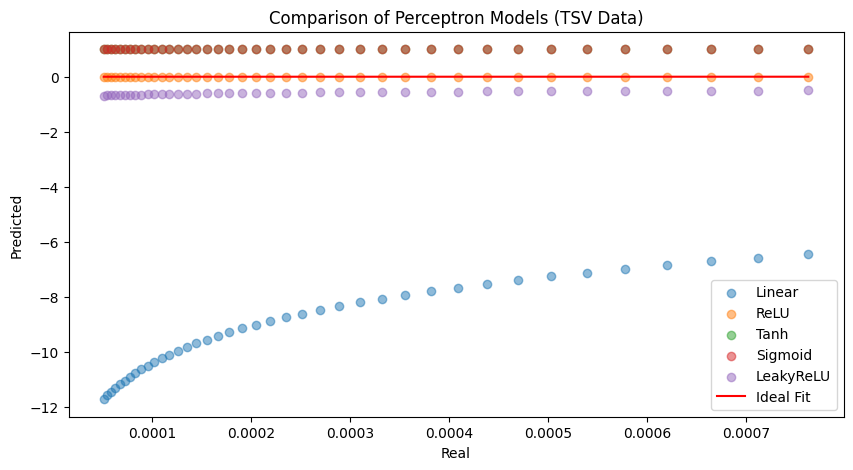

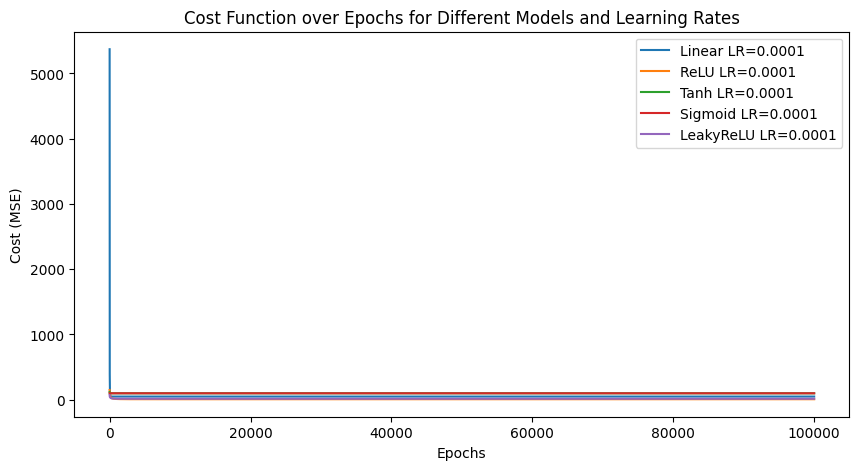

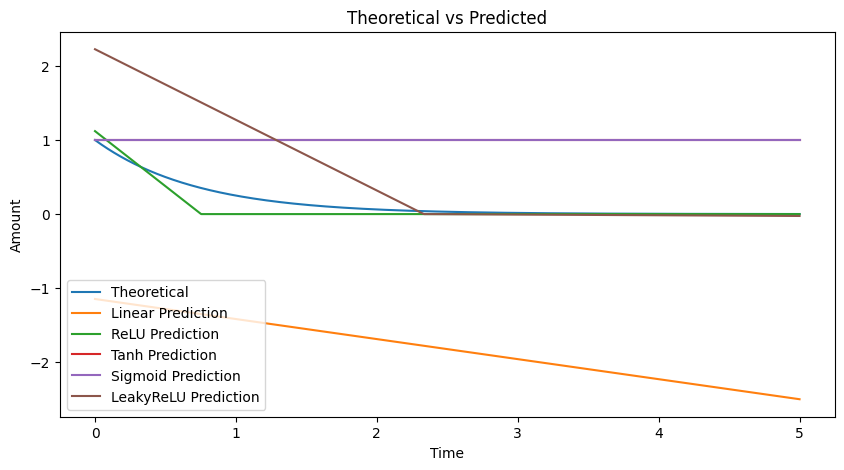

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

relu = lambda x: np.maximum(0, x)
sigmoid = lambda x: 1 / (1 + np.exp(-x))
leaky_relu = lambda x: np.where(x > 0, x, 0.01 * x)

def load_data(file_path):
  df = pd.read_csv(file_path, sep="\t").values
  return df[:, :3], df[:, 3]

def perceptron_train(X, y, activation, lr_values, epochs=100000):
  best_lr, best_w, best_b, lowest_mse = None, None, None, float('inf')
  cost_history = {}
  for lr in lr_values:
    w, b = np.random.randn(X.shape[1]), np.random.randn()
    costs = []
    for _ in range(epochs):
      y_pred = activation(X @ w + b)
      error = y - y_pred
      w += lr * (error @ X) / len(y)
      b += lr * error.mean()
      mse = np.mean(error ** 2)
      costs.append(mse)
      if mse < lowest_mse:
        best_lr, best_w, best_b, lowest_mse = lr, w, b, mse
        cost_history[lr] = costs
    return best_w, best_b, cost_history

def perceptron_predict(X, w, b, activation):
  return activation(X @ w + b)

X, y = load_data("./Data/fixed-decay.tsv")
split = int(0.8 * len(y))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

activations = {"Linear": lambda x: x, "ReLU": relu, "Tanh": np.tanh, "Sigmoid": sigmoid, "LeakyReLU": leaky_relu}
lr_values = [0.0001, 0.001, 0.01, 0.1]

models, cost_histories = {}, {}
for name, act in activations.items():
  w, b, cost_history = perceptron_train(X_train, y_train, act, lr_values)
  models[name] = (w, b)
  cost_histories[name] = cost_history

predictions = {name: perceptron_predict(X_test, w, b, act) for name, (w, b), act in zip(models, models.values(), activations.values())}
mse_values = {name: np.mean((y_test - y_pred) ** 2) for name, y_pred in predictions.items()}

for name, mse in mse_values.items():
  print(f"MSE ({name} Perceptron): {mse:.4f}")

for name, (w, b) in models.items():
  print(f"{name} Perceptron: Weights = {w}, Bias = {b:.4f}")

amount, halflife = 1, 0.5
t_values = np.linspace(0, 5, 1000)
substance = amount * pow(2.0, - t_values / halflife)

plt.figure(figsize=(10, 5))
for name, y_pred in predictions.items():
  plt.scatter(y_test, y_pred, alpha=0.5, label=name)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', label="Ideal Fit")
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.legend()
plt.title("Comparison of Perceptron Models (TSV Data)")
plt.show()

plt.figure(figsize=(10, 5))
for name, history in cost_histories.items():
  for lr, costs in history.items():
    plt.plot(costs, label=f"{name} LR={lr}")
plt.xlabel("Epochs")
plt.ylabel("Cost (MSE)")
plt.legend()
plt.title("Cost Function over Epochs for Different Models and Learning Rates")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(t_values, substance, label="Theoretical")
for name, (w, b) in models.items():
  X_sim = np.column_stack((np.full_like(t_values, amount), np.full_like(t_values, halflife), t_values))
  y_sim = perceptron_predict(X_sim, w, b, activations[name])
  plt.plot(t_values, y_sim, label=f"{name} Prediction")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.legend()
plt.title("Theoretical vs Predicted")
plt.show()

# Se entrena con valores pseudo aleatoreos $A_0, \tau, t$
# y el correspondiente $x = A\cos{2\pi f t}$

# Input:
- $A$
- $\tau$
- $2^{-\frac{t}{\tau}}$
- $2^{\frac{t}{\tau}}$

/tmp/ipykernel_39569/2109800950.py:27: RuntimeWarning: overflow encountered in square
  mse = np.mean(error ** 2)
/tmp/ipykernel_39569/2109800950.py:25: RuntimeWarning: overflow encountered in matmul
  w += lr * (error @ X) / len(y)
/tmp/ipykernel_39569/2109800950.py:25: RuntimeWarning: invalid value encountered in add
  w += lr * (error @ X) / len(y)
/home/oel/.venv/jupy3/lib/python3.11/site-packages/numpy/_core/_methods.py:136: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/tmp/ipykernel_39569/2109800950.py:23: RuntimeWarning: overflow encountered in matmul
  y_pred = activation(X @ w + b)
/tmp/ipykernel_39569/2109800950.py:26: RuntimeWarning: invalid value encountered in scalar add
  b += lr * error.mean()
/tmp/ipykernel_39569/2109800950.py:7: RuntimeWarning: overflow encountered in exp
  sigmoid = lambda x: 1 / (1 + np.exp(-x))


MSE (Linear Perceptron): nan
MSE (ReLU Perceptron): 210.3073
MSE (Tanh Perceptron): 194.2955
MSE (Sigmoid Perceptron): 194.1706
MSE (LeakyReLU Perceptron): nan
Linear Perceptron: Weights = [nan nan nan nan], Bias = -144042675.1093
ReLU Perceptron: Weights = [-9.77531863e+07 -4.92307138e+06  2.14144091e+04 -2.21780190e+18], Bias = 5.8134
Tanh Perceptron: Weights = [33675.1715753   2953.29244908   221.97431451  2749.80732536], Bias = -1.4797
Sigmoid Perceptron: Weights = [319195.35943233  27482.35438755   2159.78011464  -8187.1805398 ], Bias = -0.5215
LeakyReLU Perceptron: Weights = [nan nan nan nan], Bias = 1024571.9435


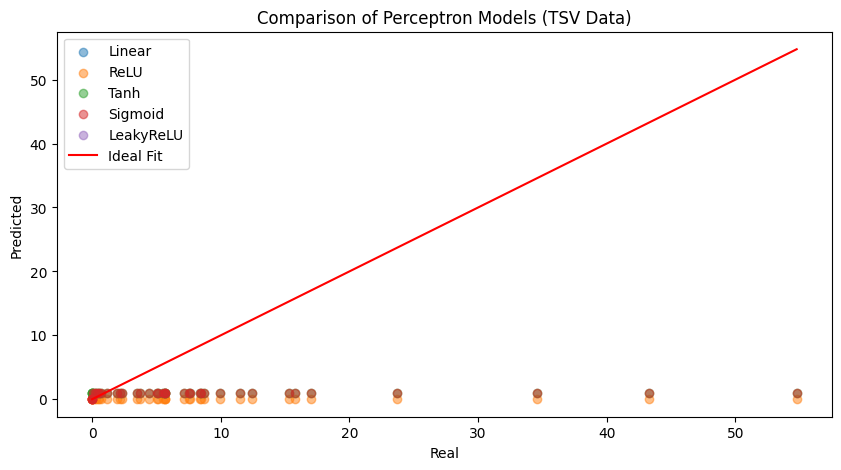

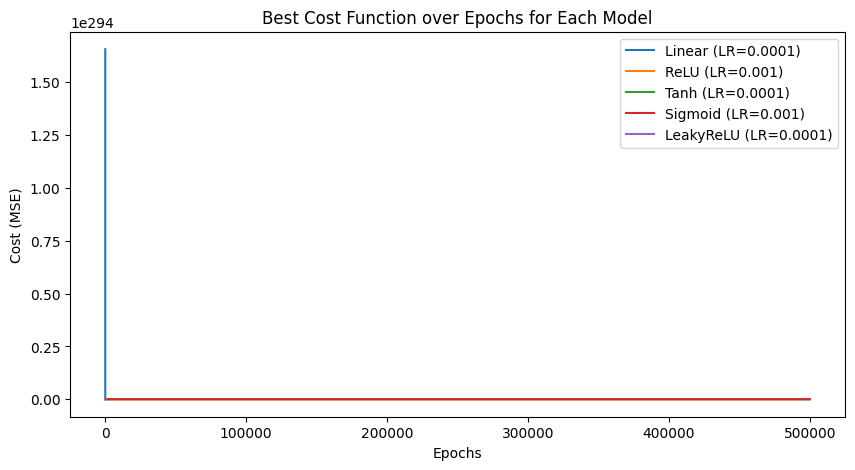

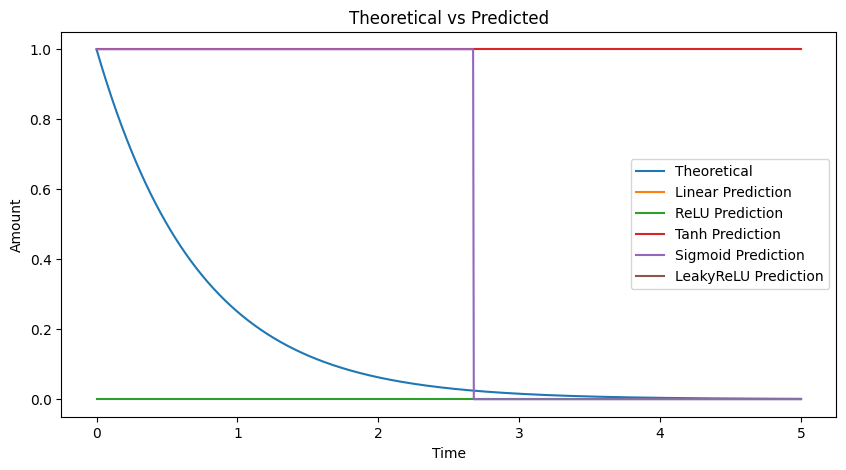

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Activation functions
relu = lambda x: np.maximum(0, x)
sigmoid = lambda x: 1 / (1 + np.exp(-x))
leaky_relu = lambda x: np.where(x > 0, x, 0.01 * x)

def load_data(file_path):
  df = pd.read_csv(file_path, sep="\t").values
  return df[:, :3], df[:, 3]

def perceptron_train(X, y, activation, lr_values, epochs=500000):
    best_lr, best_w, best_b, lowest_mse = None, None, None, float('inf')
    cost_history = {}

    for lr in lr_values:
        w, b = np.random.randn(X.shape[1]), np.random.randn()
        costs = []

        for _ in range(epochs):
            y_pred = activation(X @ w + b)
            error = y - y_pred
            w += lr * (error @ X) / len(y)
            b += lr * error.mean()
            mse = np.mean(error ** 2)
            costs.append(mse)

            if mse < lowest_mse:
                best_lr, best_w, best_b, lowest_mse = lr, w, b, mse

        cost_history[lr] = costs

    return best_w, best_b, cost_history

def perceptron_predict(X, w, b, activation):
  return activation(X @ w + b)

# Load and split data
X, y = load_data("./Data/random-decay.tsv")
split = int(0.8 * len(y))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

# Transforming time into sin and cos components
def transform_features(X):
  return np.column_stack((
    X[:, 0],
    X[:, 1],
    pow(2, -X[:, 2] /  X[:, 1]),
    pow(2, X[:, 2] /  X[:, 1]),
  ))

X_train_transformed = transform_features(X_train)
X_test_transformed = transform_features(X_test)

# Activation functions
activations = {
  "Linear": lambda x: x,
  "ReLU": relu,
  "Tanh": np.tanh,
  "Sigmoid": sigmoid,
  "LeakyReLU": leaky_relu
}
lr_values = [0.0001, 0.001, 0.01, 0.05, 0.1]

# Train models
models, cost_histories = {}, {}
for name, act in activations.items():
  w, b, cost_history = perceptron_train(X_train_transformed, y_train, act, lr_values)
  models[name] = (w, b)
  cost_histories[name] = cost_history

# Predictions
predictions = {
  name: perceptron_predict(X_test_transformed, *models[name], activations[name])
  for name in models
}

# Calculate MSE
mse_values = {
  name: np.mean((y_test - y_pred) ** 2)
  for name, y_pred in predictions.items()
}

# MSE Results
for name, mse in mse_values.items():
  print(f"MSE ({name} Perceptron): {mse:.4f}")

for name, (w, b) in models.items():
  print(f"{name} Perceptron: Weights = {w}, Bias = {b:.4f}")

# Theoretical harmonic position (for comparison)
amount, halflife = 1, 0.5
t_values = np.linspace(0, 5, 1000)
substance = amount * pow(2.0, - t_values / halflife)

# Scatter plot of predictions vs real values
plt.figure(figsize=(10, 5))
for name, y_pred in predictions.items():
  plt.scatter(y_test, y_pred, alpha=0.5, label=name)
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], 'r', label="Ideal Fit")
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.legend()
plt.title("Comparison of Perceptron Models (TSV Data)")
plt.show()

# Cost function over epochs (only best LR per model)
plt.figure(figsize=(10, 5))
for name, history in cost_histories.items():
  best_lr = min(history, key=lambda lr: history[lr][-1])  # Find LR with lowest final cost
  plt.plot(history[best_lr], label=f"{name} (LR={best_lr})")

plt.xlabel("Epochs")
plt.ylabel("Cost (MSE)")
plt.legend()
plt.title("Best Cost Function over Epochs for Each Model")
plt.show()

# Theoretical vs predicted position in harmonic motion
plt.figure(figsize=(10, 5))
plt.plot(t_values, substance, label="Theoretical")
for name, (w, b) in models.items():
  X_sim = np.column_stack((np.full_like(t_values, amount), np.full_like(t_values, halflife), t_values))
  X_sim_transformed = transform_features(X_sim)
  y_sim = perceptron_predict(X_sim_transformed, w, b, activations[name])
  plt.plot(t_values, y_sim, label=f"{name} Prediction")

plt.xlabel("Time")
plt.ylabel("Amount")
plt.legend()
plt.title("Theoretical vs Predicted")
plt.show()

# Se eliminan los metodos que se alejan por completo i.e $A \to \infty$

MSE (ReLU Perceptron): 45.3361
MSE (Tanh Perceptron): 194.2955
MSE (Sigmoid Perceptron): 194.2955
ReLU Perceptron: Weights = [ 0.21510691  0.11536055 55.88046361], Bias = -13.2497
Tanh Perceptron: Weights = [15741875.70563112  1363865.20586259   107974.49250863], Bias = 0.2984
Sigmoid Perceptron: Weights = [31481.91371795  2727.90742974   214.69252829], Bias = -0.2735


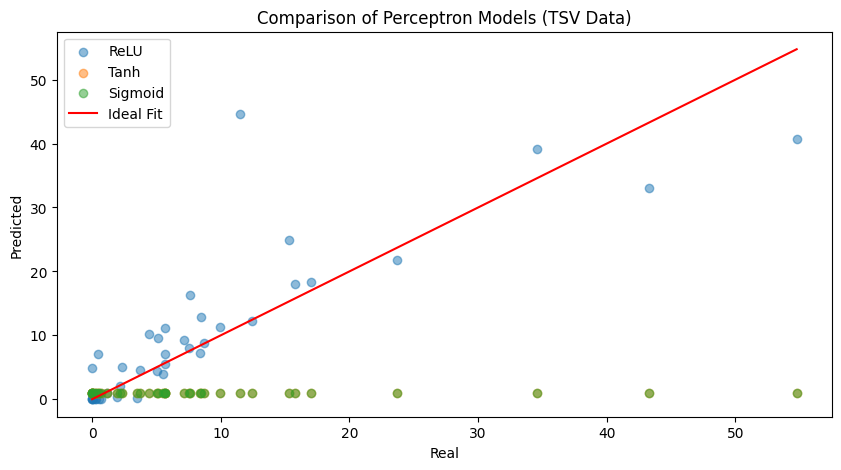

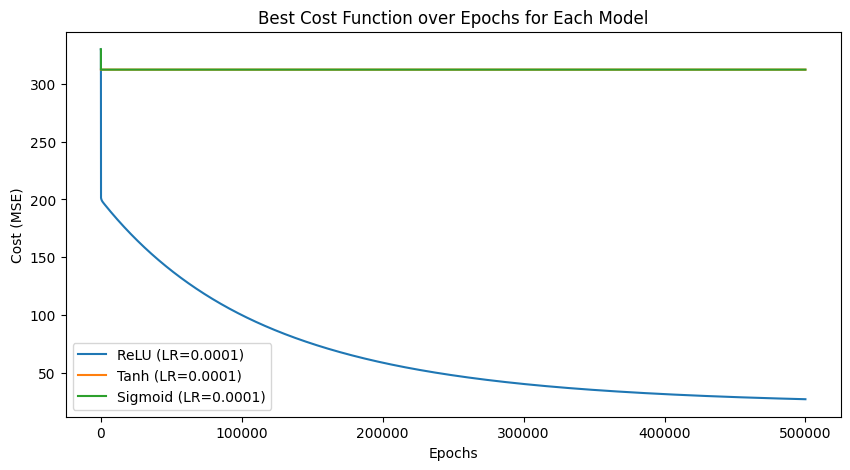

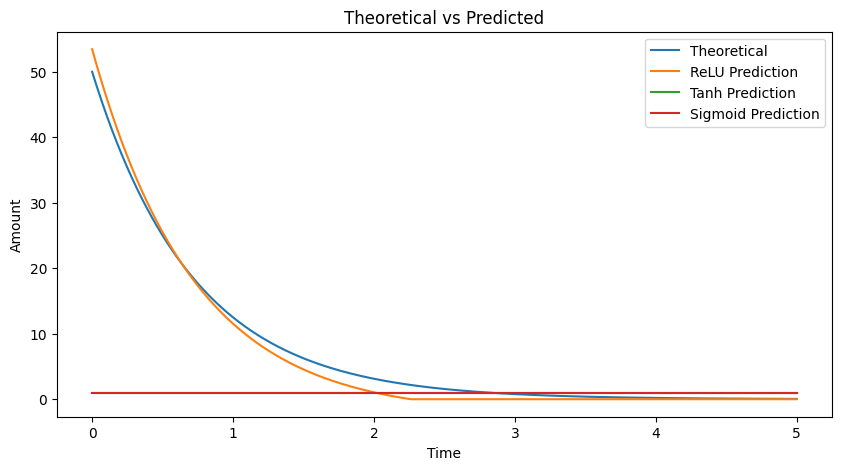

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Activation functions
relu = lambda x: np.maximum(0, x)
sigmoid = lambda x: 1 / (1 + np.exp(-x))
leaky_relu = lambda x: np.where(x > 0, x, 0.01 * x)

def load_data(file_path):
  df = pd.read_csv(file_path, sep="\t").values
  return df[:, :3], df[:, 3]

def perceptron_train(X, y, activation, lr_values, epochs=500000):
    best_lr, best_w, best_b, lowest_mse = None, None, None, float('inf')
    cost_history = {}

    for lr in lr_values:
        w, b = np.random.randn(X.shape[1]), np.random.randn()
        costs = []

        for _ in range(epochs):
            y_pred = activation(X @ w + b)
            error = y - y_pred
            w += lr * (error @ X) / len(y)
            b += lr * error.mean()
            mse = np.mean(error ** 2)
            costs.append(mse)

            if mse < lowest_mse:
                best_lr, best_w, best_b, lowest_mse = lr, w, b, mse

        cost_history[lr] = costs

    return best_w, best_b, cost_history

def perceptron_predict(X, w, b, activation):
  return activation(X @ w + b)

# Load and split data
X, y = load_data("./Data/random-decay.tsv")
split = int(0.8 * len(y))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

# Transforming time into sin and cos components
def transform_features(X):
  return np.column_stack((
    X[:, 0],
    X[:, 1],
    pow(2, -X[:, 2] /  X[:, 1]),
  ))

X_train_transformed = transform_features(X_train)
X_test_transformed = transform_features(X_test)

# Activation functions
activations = {
  "ReLU": relu,
  "Tanh": np.tanh,
  "Sigmoid": sigmoid,
}
lr_values = [0.0001, 0.001, 0.01, 0.05, 0.1]

# Train models
models, cost_histories = {}, {}
for name, act in activations.items():
  w, b, cost_history = perceptron_train(X_train_transformed, y_train, act, lr_values)
  models[name] = (w, b)
  cost_histories[name] = cost_history

# Predictions
predictions = {
  name: perceptron_predict(X_test_transformed, *models[name], activations[name])
  for name in models
}

# Calculate MSE
mse_values = {
  name: np.mean((y_test - y_pred) ** 2)
  for name, y_pred in predictions.items()
}

# MSE Results
for name, mse in mse_values.items():
  print(f"MSE ({name} Perceptron): {mse:.4f}")

for name, (w, b) in models.items():
  print(f"{name} Perceptron: Weights = {w}, Bias = {b:.4f}")

# Theoretical harmonic position (for comparison)
amount, halflife = 50, 0.5
t_values = np.linspace(0, 5, 1000)
substance = amount * pow(2.0, - t_values / halflife)

# Scatter plot of predictions vs real values
plt.figure(figsize=(10, 5))
for name, y_pred in predictions.items():
  plt.scatter(y_test, y_pred, alpha=0.5, label=name)
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], 'r', label="Ideal Fit")
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.legend()
plt.title("Comparison of Perceptron Models (TSV Data)")
plt.show()

# Cost function over epochs (only best LR per model)
plt.figure(figsize=(10, 5))
for name, history in cost_histories.items():
  best_lr = min(history, key=lambda lr: history[lr][-1])  # Find LR with lowest final cost
  plt.plot(history[best_lr], label=f"{name} (LR={best_lr})")

plt.xlabel("Epochs")
plt.ylabel("Cost (MSE)")
plt.legend()
plt.title("Best Cost Function over Epochs for Each Model")
plt.show()

# Theoretical vs predicted position in harmonic motion
plt.figure(figsize=(10, 5))
plt.plot(t_values, substance, label="Theoretical")
for name, (w, b) in models.items():
  X_sim = np.column_stack((np.full_like(t_values, amount), np.full_like(t_values, halflife), t_values))
  X_sim_transformed = transform_features(X_sim)
  y_sim = perceptron_predict(X_sim_transformed, w, b, activations[name])
  plt.plot(t_values, y_sim, label=f"{name} Prediction")

plt.xlabel("Time")
plt.ylabel("Amount")
plt.legend()
plt.title("Theoretical vs Predicted")
plt.show()

# Se entrena con valores fijos $A_0, \tau$, con $t$ variable y al correspondiente
# $x = A\cos{2\pi f t}$

# Input:
- $A$
- $\tau$
- $2^{-\frac{t}{\tau}}$
- $2^{\frac{t}{\tau}}$

MSE (ReLU Perceptron): 0.0000
MSE (Tanh Perceptron): 0.9995
MSE (Sigmoid Perceptron): 0.9995
ReLU Perceptron: Weights = [ 0.07136141 -0.48917941 50.03461837], Bias = -1.2048
Tanh Perceptron: Weights = [8452.94853873  844.59646685   98.82386468], Bias = -0.4718
Sigmoid Perceptron: Weights = [8453.42861245  844.71343585  100.47468783], Bias = -0.0386


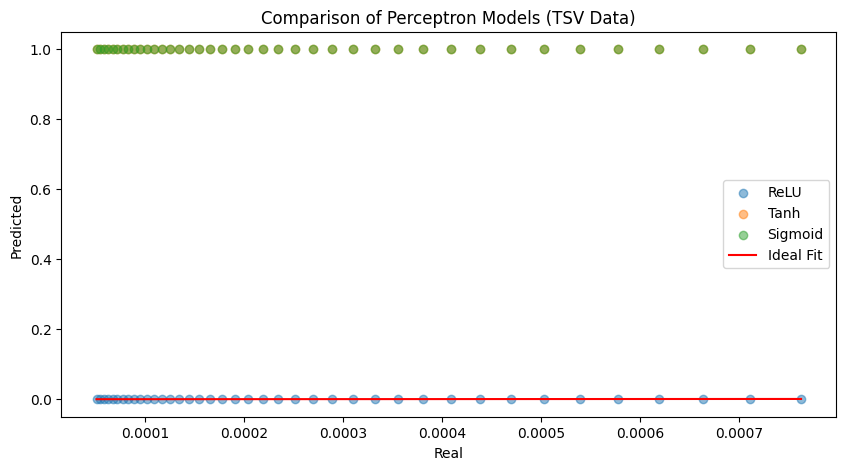

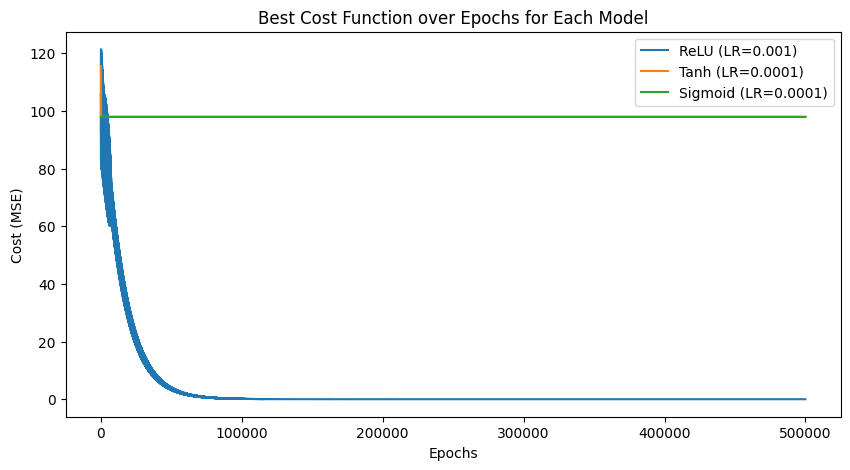

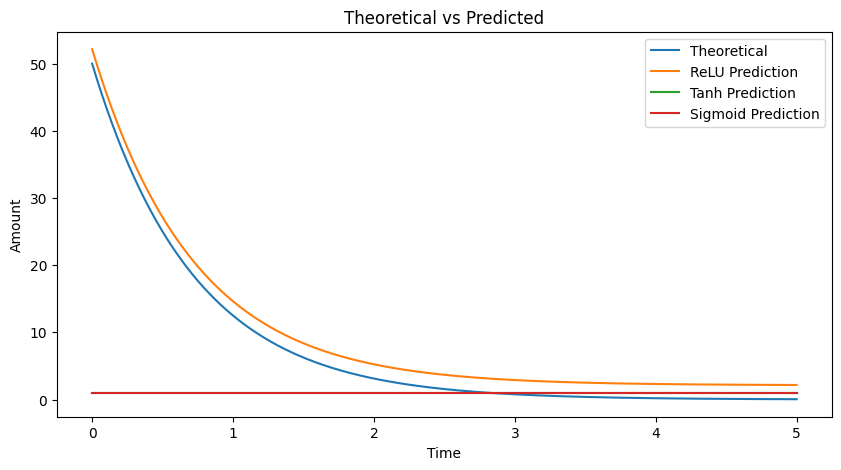

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Activation functions
relu = lambda x: np.maximum(0, x)
sigmoid = lambda x: 1 / (1 + np.exp(-x))
leaky_relu = lambda x: np.where(x > 0, x, 0.01 * x)

def load_data(file_path):
  df = pd.read_csv(file_path, sep="\t").values
  return df[:, :3], df[:, 3]

def perceptron_train(X, y, activation, lr_values, epochs=500000):
    best_lr, best_w, best_b, lowest_mse = None, None, None, float('inf')
    cost_history = {}

    for lr in lr_values:
        w, b = np.random.randn(X.shape[1]), np.random.randn()
        costs = []

        for _ in range(epochs):
            y_pred = activation(X @ w + b)
            error = y - y_pred
            w += lr * (error @ X) / len(y)
            b += lr * error.mean()
            mse = np.mean(error ** 2)
            costs.append(mse)

            if mse < lowest_mse:
                best_lr, best_w, best_b, lowest_mse = lr, w, b, mse

        cost_history[lr] = costs

    return best_w, best_b, cost_history

def perceptron_predict(X, w, b, activation):
  return activation(X @ w + b)

# Load and split data
X, y = load_data("./Data/fixed-decay.tsv")
split = int(0.8 * len(y))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

# Transforming time into sin and cos components
def transform_features(X):
  return np.column_stack((
    X[:, 0],
    X[:, 1],
    pow(2, -X[:, 2] /  X[:, 1]),
  ))

X_train_transformed = transform_features(X_train)
X_test_transformed = transform_features(X_test)

# Activation functions
activations = {
  "ReLU": relu,
  "Tanh": np.tanh,
  "Sigmoid": sigmoid,
}
lr_values = [0.0001, 0.001, 0.01, 0.05, 0.1]

# Train models
models, cost_histories = {}, {}
for name, act in activations.items():
  w, b, cost_history = perceptron_train(X_train_transformed, y_train, act, lr_values)
  models[name] = (w, b)
  cost_histories[name] = cost_history

# Predictions
predictions = {
  name: perceptron_predict(X_test_transformed, *models[name], activations[name])
  for name in models
}

# Calculate MSE
mse_values = {
  name: np.mean((y_test - y_pred) ** 2)
  for name, y_pred in predictions.items()
}

# MSE Results
for name, mse in mse_values.items():
  print(f"MSE ({name} Perceptron): {mse:.4f}")

for name, (w, b) in models.items():
  print(f"{name} Perceptron: Weights = {w}, Bias = {b:.4f}")

# Theoretical harmonic position (for comparison)
amount, halflife = 50, 0.5
t_values = np.linspace(0, 5, 1000)
substance = amount * pow(2.0, - t_values / halflife)

# Scatter plot of predictions vs real values
plt.figure(figsize=(10, 5))
for name, y_pred in predictions.items():
  plt.scatter(y_test, y_pred, alpha=0.5, label=name)
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], 'r', label="Ideal Fit")
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.legend()
plt.title("Comparison of Perceptron Models (TSV Data)")
plt.show()

# Cost function over epochs (only best LR per model)
plt.figure(figsize=(10, 5))
for name, history in cost_histories.items():
  best_lr = min(history, key=lambda lr: history[lr][-1])  # Find LR with lowest final cost
  plt.plot(history[best_lr], label=f"{name} (LR={best_lr})")

plt.xlabel("Epochs")
plt.ylabel("Cost (MSE)")
plt.legend()
plt.title("Best Cost Function over Epochs for Each Model")
plt.show()

# Theoretical vs predicted position in harmonic motion
plt.figure(figsize=(10, 5))
plt.plot(t_values, substance, label="Theoretical")
for name, (w, b) in models.items():
  X_sim = np.column_stack((np.full_like(t_values, amount), np.full_like(t_values, halflife), t_values))
  X_sim_transformed = transform_features(X_sim)
  y_sim = perceptron_predict(X_sim_transformed, w, b, activations[name])
  plt.plot(t_values, y_sim, label=f"{name} Prediction")

plt.xlabel("Time")
plt.ylabel("Amount")
plt.legend()
plt.title("Theoretical vs Predicted")
plt.show()